In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv("data/spambase.data")

In [6]:
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [8]:
data.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
# Separando as variáveis independentes das dependentes
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
# Verificando a distribuição de classe do dataset
class_distribution = y.value_counts(normalize=True)
class_distribution

1
0    0.606087
1    0.393913
Name: proportion, dtype: float64

In [11]:
# Divisão dos dados de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
# Normalização do conjunto de dados de treinamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Preparação do treinamento do modelo. O modelo dividirá o conjunto de dados em 5 vezes/folds - 4 para treinamento e 1 para validação - para cada combinação de hiperparâmetros. 

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']    
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500, solver='liblinear'),
    param_grid, scoring='f1', cv=5
)

In [14]:
# Treinamento do modelo de acordo com o grid_search instanciado
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

In [15]:
#Melhores hiper-parâmetros
grid_search.best_params_

{'C': 10, 'penalty': 'l1'}

In [16]:
# Lista de saídas (previsões) dado o conjunto de Testes

y_pred = grid_search.best_estimator_.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 1, 0], shape=(1380,))

In [17]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1'}

In [18]:
grid_search.best_score_

np.float64(0.9028430614597923)

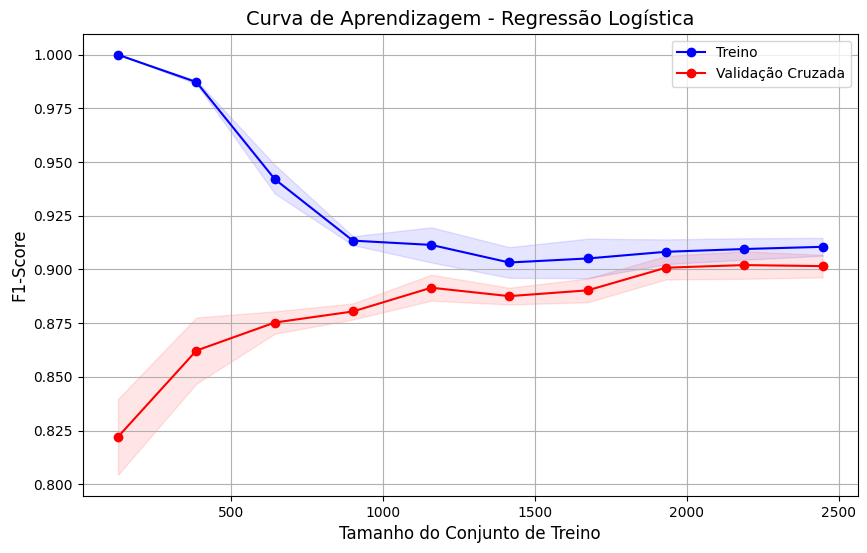

In [19]:
# Configuração da curva de aprendizagem

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.05, 0.95, 10)  # De 5% a 95% do treino
train_sizes, train_scores, test_scores = learning_curve(
    best_model, 
    X_train_scaled, 
    y_train, 
    train_sizes=train_sizes, 
    cv=5, 
    scoring='f1',
    n_jobs=-1 
)

# Cálculo das médias e desvios
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Treino")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validação Cruzada")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
plt.title("Curva de Aprendizagem - Regressão Logística", fontsize=14)
plt.xlabel("Tamanho do Conjunto de Treino", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

Acurácia: 0.9319
Precisão: 0.9213
Recall: 0.9044
F1-Score: 0.9128

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       836
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1380
   macro avg       0.93      0.93      0.93      1380
weighted avg       0.93      0.93      0.93      1380



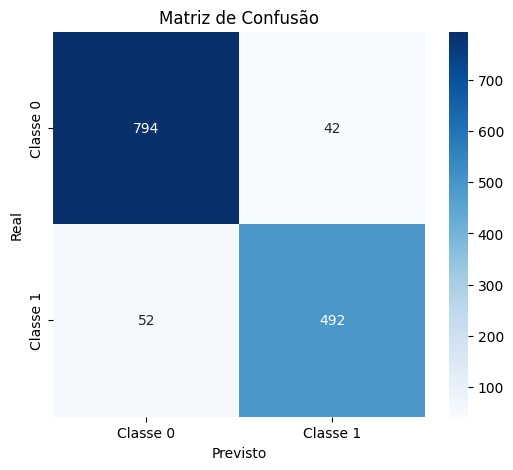

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibição das métricas principais
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


In [ ]:

# Nova divisão 95/5
X_train_95, X_test_5, y_train_95, y_test_5 = train_test_split(X, y, test_size=0.05, stratify=y, random_state=42)

# Normalização para 95/5
X_train_95_scaled = scaler.fit_transform(X_train_95)
X_test_5_scaled = scaler.transform(X_test_5)

# Treinando e prevendo para 95/5
grid_search_95 = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500, solver='liblinear'),
    param_grid, scoring='f1', cv=5
)
grid_search_95.fit(X_train_95_scaled, y_train_95)
y_pred_95_5 = grid_search_95.best_estimator_.predict(X_test_5_scaled)

accuracy = accuracy_score(y_test_5, y_pred_95_5)
precision = precision_score(y_test_5, y_pred_95_5)
recall = recall_score(y_test_5, y_pred_95_5)
f1 = f1_score(y_test_5, y_pred_95_5)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nRelatório de Classificação:\n")
print(classification_report(y_test_5, y_pred_95_5))

Acurácia: 0.9348
Precisão: 0.9043
Recall: 0.9341
F1-Score: 0.9189

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       139
           1       0.90      0.93      0.92        91

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.94      0.93      0.93       230

